Denys Starokon

Clustering by means of the Scikit-Learn library

First data set:

In [28]:
#Libraries
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.cluster import SpectralClustering
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

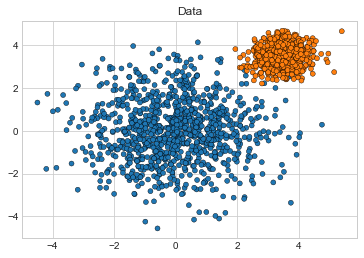

In [29]:
#Plotting the initial data
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 700
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs ( n_samples=[n_samples_1 , n_samples_2 ], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [30]:
#Normalizing the data
X = StandardScaler().fit_transform(X)

In [31]:
#Building clusterization and calculating its time
tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

289.824462890625 ms


In [32]:
#Calculating the quality metrics of clusterization
core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

Estimated number of clusters: 2
Adjusted Rand Index: 0.942
Homogeneity: 0.906
Davies-Bouldin index 0.495


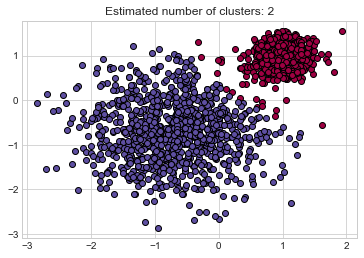

In [33]:
#Plotting clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [34]:
#Let's check the clusterization when the number of samples is increased by 2 times
from sklearn.datasets import make_blobs
n_samples_1 = 2000
n_samples_2 = 1400
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs ( n_samples=[n_samples_1 , n_samples_2 ], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)
X = StandardScaler().fit_transform(X)

tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

1016.90380859375 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.926
Homogeneity: 0.886
Davies-Bouldin index 0.497


In [35]:
#Let's check the clusterization when the number of samples is increased by 10 times
from sklearn.datasets import make_blobs
n_samples_1 = 10000
n_samples_2 = 7000
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs ( n_samples=[n_samples_1 , n_samples_2 ], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)
X = StandardScaler().fit_transform(X)

tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

46059.597412109375 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.905
Homogeneity: 0.862
Davies-Bouldin index 0.502


As you can see, when the number of points increases, the values of the metrics almost do not change, but the execution time increases significantly

In [36]:
#Changing the assign_labels parameter from 'discretize' to 'kmeans'
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 700
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs ( n_samples=[n_samples_1 , n_samples_2 ], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)
X = StandardScaler().fit_transform(X)

tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='kmeans', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

C:\Users\Vanyusha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


1435.334228515625 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.928
Homogeneity: 0.889
Davies-Bouldin index 0.497


In [37]:
#Changing the assign_labels to 'cluster_qr'
tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='cluster_qr', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

245.89208984375 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.933
Homogeneity: 0.894
Davies-Bouldin index 0.497


In [38]:
#Using affinity='nearest_neighbors' (by default affinity='rbf')
tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity='nearest_neighbors').fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

158.906494140625 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.974
Homogeneity: 0.951
Davies-Bouldin index 0.493


We can see that when the values of the parameters of the basic model and the distance function change, the quality metrics of clusterization almost do not change.
But the execution time changes: with assign_labels='kmeans' it is the longest, and with affinity='nearest_neighbors' it is the shortest.

In [39]:
#Setting the value n_clusters = 4
tik = time.time()
sc = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

312.491455078125 ms
Estimated number of clusters: 4
Adjusted Rand Index: 0.534
Homogeneity: 0.944
Davies-Bouldin index 0.812


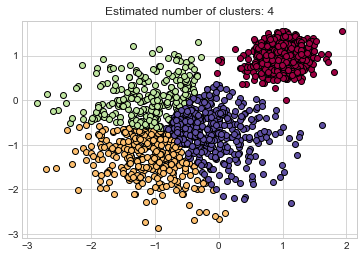

In [40]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [41]:
#Setting the value n_clusters = 10
tik = time.time()
sc = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

243.99462890625 ms
Estimated number of clusters: 10
Adjusted Rand Index: 0.351
Homogeneity: 0.933
Davies-Bouldin index 0.868


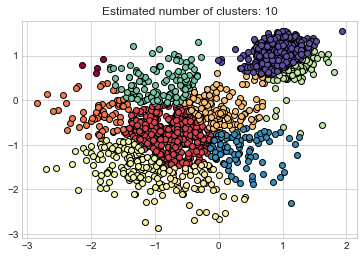

In [42]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [43]:
#Let's check whether the clusterization is stable after removing individual objects
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X_test, y_test)
core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_test, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X_test, labels))

Estimated number of clusters: 2
Adjusted Rand Index: 0.908
Homogeneity: 0.865
Davies-Bouldin index 0.528


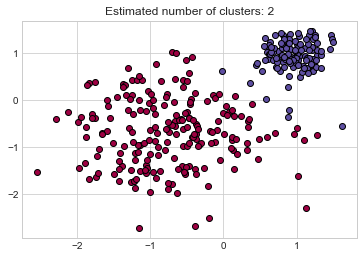

In [44]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_test[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_test[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

We can see that the partition is stable after removing individual objects

On this data set, the best clustering model is SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity='nearest_neighbors')

Second data set:

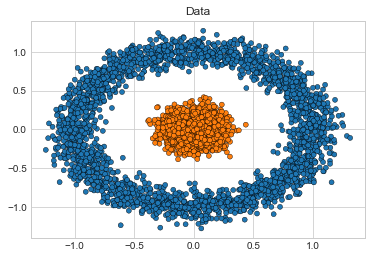

In [45]:
#Plotting the initial data
from sklearn.datasets import make_circles
X, y = make_circles(5000, factor =.1, noise =.1)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [46]:
#Normalizing the data
X = StandardScaler().fit_transform(X)

In [47]:
#Building clusterization and calculating its time
tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

2429.583740234375 ms


In [48]:
#Calculating the quality metrics of clusterization
core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

Estimated number of clusters: 2
Adjusted Rand Index: 0.998
Homogeneity: 0.995
Davies-Bouldin index 626.088


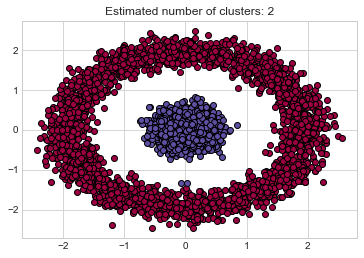

In [49]:
#Plotting clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [50]:
#Let's check the clusterization when the number of samples is increased by 2 times
X, y = make_circles(10000, factor =.1, noise =.1)
X = StandardScaler().fit_transform(X)

tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

12794.90478515625 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.999
Homogeneity: 0.996
Davies-Bouldin index 248.079


As you can see, when the number of points increases, the values of the metrics improve, but the execution time increases greatly

In [51]:
#Changing parametr assign_labels from 'discretize' to 'kmeans'
X, y = make_circles(5000, factor =.1, noise =.1)
X = StandardScaler().fit_transform(X)

tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='kmeans', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

3232.578125 ms
Estimated number of clusters: 2
Adjusted Rand Index: 0.999
Homogeneity: 0.997
Davies-Bouldin index 5927.007


In [52]:
#Changing parametr assign_labels to 'cluster_qr'
tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='cluster_qr', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

2785.444580078125 ms
Estimated number of clusters: 2
Adjusted Rand Index: 1.000
Homogeneity: 1.000
Davies-Bouldin index 3107.745


In [53]:
#Using affinity='nearest_neighbors' (by default affinity='rbf')
tik = time.time()
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity='nearest_neighbors').fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

C:\Users\Vanyusha\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


1847.9599609375 ms
Estimated number of clusters: 2
Adjusted Rand Index: 1.000
Homogeneity: 1.000
Davies-Bouldin index 3107.745


We can see that when the values of the parameters of the basic model and the distance function change, the quality metrics of clusterization almost do not change. But the execution time changes: with assign_labels='kmeans' it is the longest, and with affinity='nearest_neighbors' it is the shortest.

In [54]:
#Let's try using n_clusters=4
tik = time.time()
sc = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

2470.02197265625 ms
Estimated number of clusters: 4
Adjusted Rand Index: 0.667
Homogeneity: 1.000
Davies-Bouldin index 0.816


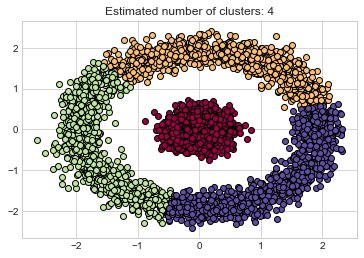

In [55]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [56]:
#Let's try using n_clusters=10
tik = time.time()
sc = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X, labels))

2710.19091796875 ms
Estimated number of clusters: 10
Adjusted Rand Index: 0.556
Homogeneity: 1.000
Davies-Bouldin index 0.580


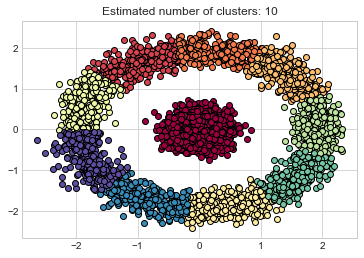

In [57]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [58]:
#Let's check whether the clusterization is stable after removing individual objects
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X_test, y_test)
core_samples_mask = np.zeros_like(sc.labels_, dtype=bool)
labels = sc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_test, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test, labels))
print("Davies-Bouldin index %0.3f" % metrics.davies_bouldin_score(X_test, labels))

Estimated number of clusters: 2
Adjusted Rand Index: 0.239
Homogeneity: 0.295
Davies-Bouldin index 1.239


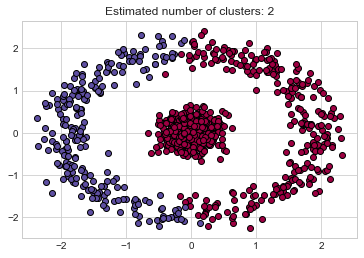

In [59]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_test[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_test[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

We see that the partitioning works incorrectly after removing individual objects

On this data set, the best clusterization model is SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity='nearest_neighbors')